<a href="https://colab.research.google.com/github/anupbagale/2D_Classification/blob/main/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(

     rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         vertical_flip=True
)

train_data= train_datagen.flow_from_directory(
    directory= '/content/drive/MyDrive/archive (1)/Data/train',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 5144 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
test_datagen= ImageDataGenerator(

     rescale=1./255,

)

test_data= test_datagen.flow_from_directory(
    directory= '/content/drive/MyDrive/archive (1)/Data/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 1292 images belonging to 3 classes.


In [ ]:
test_data.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
# Create a custom callback to collect training metrics during each epoch.
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    def on_epoch_end(self, epoch, logs=None):
      # Store training metrics in the history dictionary.
        for key in logs:
            self.history[key].append(logs[key])

# Initialize the custom callback
metrics_callback = MetricsCallback()

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

# Compile the model with optimizer, loss function, and metrics.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [ ]:
model.fit(train_data, steps_per_epoch=len(train_data), epochs=10,
          validation_data=test_data, validation_steps=len(test_data),
          callbacks=[metrics_callback])


Epoch 1/10
161/161 [==============================] - 1009s 6s/step - loss: 0.8408 - accuracy: 0.6604 - val_loss: 0.5121 - val_accuracy: 0.7376
Epoch 2/10
161/161 [==============================] - 254s 2s/step - loss: 0.5991 - accuracy: 0.7339 - val_loss: 0.4705 - val_accuracy: 0.8622
Epoch 3/10
161/161 [==============================] - 256s 2s/step - loss: 0.5368 - accuracy: 0.7947 - val_loss: 0.4351 - val_accuracy: 0.8754
Epoch 4/10
161/161 [==============================] - 255s 2s/step - loss: 0.4957 - accuracy: 0.8054 - val_loss: 0.3981 - val_accuracy: 0.8615
Epoch 5/10
161/161 [==============================] - 257s 2s/step - loss: 0.4514 - accuracy: 0.8186 - val_loss: 0.3663 - val_accuracy: 0.8971
Epoch 6/10
161/161 [==============================] - 256s 2s/step - loss: 0.4397 - accuracy: 0.8402 - val_loss: 0.2810 - val_accuracy: 0.9110
Epoch 7/10
161/161 [==============================] - 257s 2s/step - loss: 0.3856 - accuracy: 0.8575 - val_loss: 0.2590 - val_accuracy: 0.910

In [ ]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


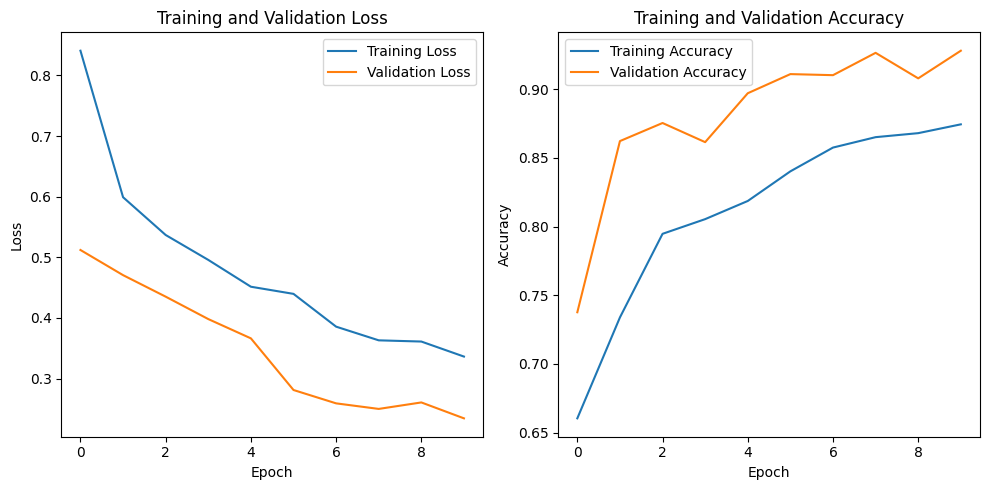

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(metrics_callback.history['loss'], label='Training Loss')
plt.plot(metrics_callback.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics_callback.history['accuracy'], label='Training Accuracy')
plt.plot(metrics_callback.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data, verbose=False)

print("Accuracy:", accuracy)
print("Loss:", loss)


Accuracy: 0.9280185699462891
Loss: 0.23429471254348755
